# GCPDS Utils

## Load Databases

`gcpds.utils.loaddb` contains a handler to load databases.

In [1]:
from gcpds.utils import loaddb

To list the databases available

In [2]:
loaddb.databases

['GIGA', 'BCI2a', 'GIGA_Laplacian']

For example if we want to use `BCI2a`, we must instatiate `loaddb.BCI2a` with the folder path that contains the database, then:

In [3]:
db = loaddb.BCI2a('BCI2a_database')

There is some common information for the database.

In [4]:
print(db.subjects)
print(db.channels)
print(db.fs) # Sampling frequency
print(db.classes)

['A01T.mat', 'A01E.mat', 'A09E.mat', 'A02T.mat', 'A04T.mat', 'A03E.mat', 'A02E.mat', 'A04E.mat', 'A03T.mat', 'A05T.mat', 'A05E.mat', 'A07T.mat', 'A07E.mat', 'A06E.mat', 'A08T.mat', 'A06T.mat', 'A09T.mat', 'A08E.mat']
['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']
250
['left hand', 'right hand', 'feet', 'tongue']


The data by subject can be accessed with:

In [5]:
db.load_subject(1)
print(f'The subject 1 has {db.runs} runs')

The subject 1 has 6 runs


If the database does not exist or is corrupted, it will be downloaded.

Afted load a subject and when available, the trials can be read by runs.

In [6]:
# This will return all trials and all channels for run 0
run, class_ = db.get_run(0)
run.shape, class_.shape

((48, 22, 1750), (48,))

The run are sorted in `trials x channels x time`

Is possible to filter the runs by `channel` and/or `class`

In [7]:
# This will return the first two classes (left hand, right hand) for only the channels C3 and C4
run, class_ = db.get_run(1, class_=[0, 1], channels=['C3', 'C4'])
run.shape, class_.shape

((24, 2, 1750), (24,))

In [8]:
run, class_ = db.get_all_runs(class_=[0, 1], channels=['C3', 'Cz', 'C4'])
run.shape, class_.shape

((144, 3, 1750), (144,))

## EEG Filters

In [9]:
from gcpds.utils import filters as flt

INFO:root:Frequency sample is 250 Hz by default.


In [10]:
from matplotlib import pyplot as plt
fs = db.fs
data = run[0][0][:fs]

There are some predefined filters: `notch60`, `band545`, `band330`, `band245`, `band440`, `delta`, `theta`, `alpha`, `beta`, `band1100`, `mu`, `band150`, `band713`, `band1550` and `band550`

INFO:root:Compiled `Butter` filter for 250.00 Hz
INFO:root:Compiled `Butter` filter for 250.00 Hz
INFO:root:Compiled `Butter` filter for 250.00 Hz


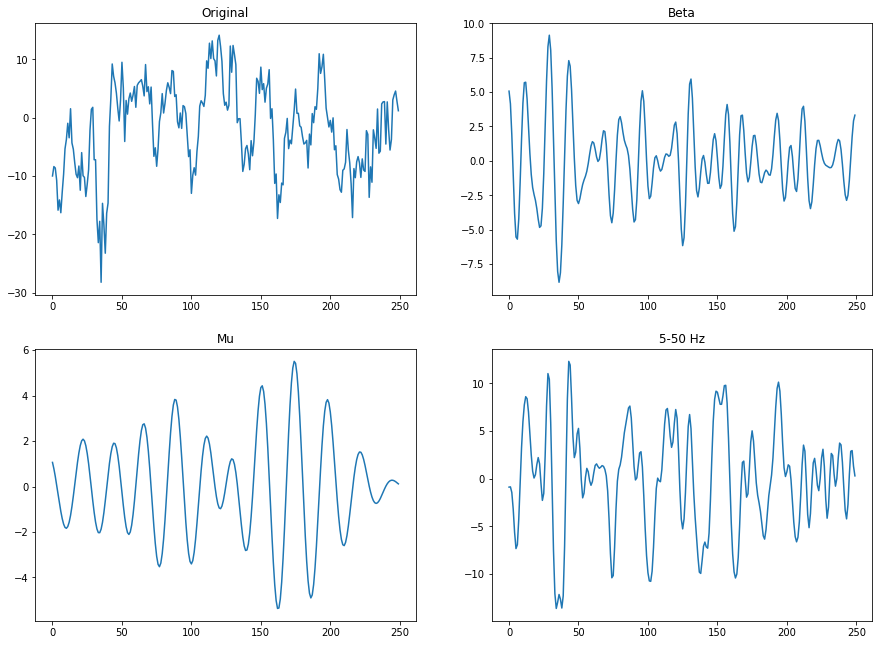

In [11]:
plt.figure(figsize=(15, 11))

plt.subplot(221)
plt.title('Original')
plt.plot(data)

plt.subplot(222)
plt.title('Beta')
plt.plot(flt.beta(data, fs=250))

plt.subplot(223)
plt.title('Mu')
plt.plot(flt.mu(data, fs=250))

plt.subplot(224)
plt.title('5-50 Hz')
plt.plot(flt.band550(data, fs=250))

plt.show()

A custom filter can be declared with the methods `GenericButterBand` and `GenericNotch` 

INFO:root:Compiled `Notch` filter for 250.00 Hz
INFO:root:Compiled `Butter` filter for 250.00 Hz


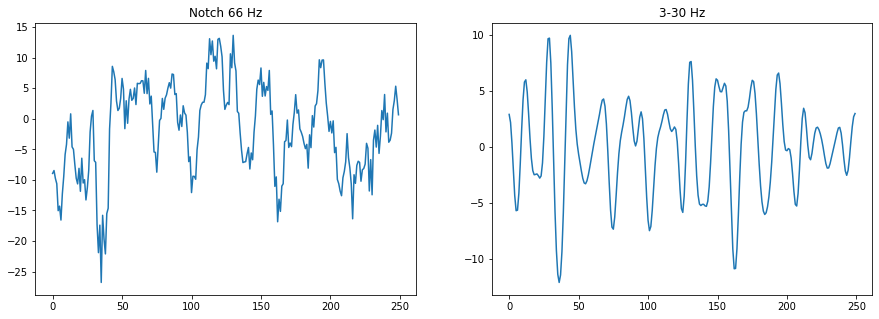

In [12]:
notch66 =  flt.GenericNotch(f0=66, fs=250)
band830 =  flt.GenericButterBand(f0=8, f1=30, fs=250)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Notch 66 Hz')
plt.plot(notch66(data, fs=250))

plt.subplot(122)
plt.title('3-30 Hz')
plt.plot(band830(data, fs=250))

plt.show()

The same filter is automatically recompilled for a different sampling rate.

INFO:root:Compiled `Notch` filter for 512.01 Hz
INFO:root:Compiled `Butter` filter for 512.01 Hz


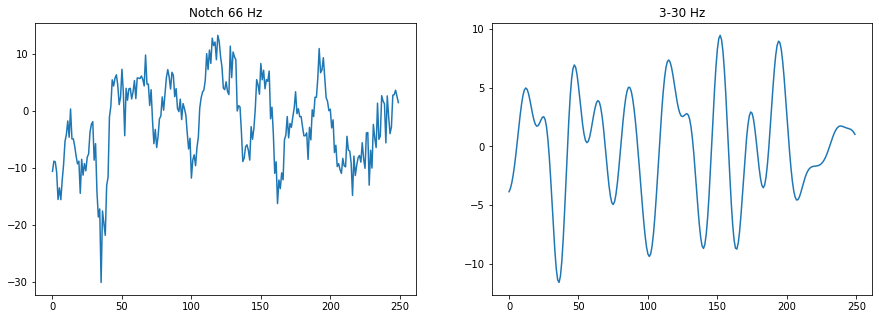

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Notch 66 Hz')
plt.plot(notch66(data, fs=512))

plt.subplot(122)
plt.title('3-30 Hz')
plt.plot(band830(data, fs=512))

plt.show()